In [2]:
import pandas as pd
import numpy as np

import pyodbc   # for connecting database

### CONNECTING TO DATABASE

We used MS SQL Server to import the excel file. Now, we are connecting to the database using *pyodbc* library

In [3]:
import json             # for reading the key inside the json formatted file

f = open('log.json')
sql_key = json.load(f)     # returns JSON object as a dictionary
#sql_key['key']            # and here is the key

Instead of declaring connection string in scripts, adding it to a *json* file to ignore in Github commit in the further stage. Simply, we are doing this to sustain the **security**

In [4]:
cnxn = pyodbc.connect(sql_key['key'])     # establish a connection
crsr = cnxn.cursor()                      # cursor enables to send command

Reading SQL data with Pandas Library

In [5]:
# read a table
df = pd.read_sql("SELECT * FROM dbo.dataset", cnxn)

C:\Users\emirh\AppData\Local\Temp\ipykernel_12832\928603235.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM dbo.dataset", cnxn)


In [6]:
df.head(10)     # printing to check

,ID,CEK_NO,CEK_TUTAR,VADE_TARIH,VADE_GUN,ISTIHBARAT_SONUC,POLITIKA_SONUC,CEK_RENK,KULLANDIRIM,SUBE,...,T4_NAKDILIMIT_TPL,T4_NAKDIRISK_TPL,T4_NAKDIRISK_KV,T4_NAKDIRISK_OV,T4_NAKDIRISK_UV,T4_GAYRINAKDILIMIT,T4_GAYRINAKDIRISK,T4_FKTRNG_LIMIT,T4_FKTRNG_TPLRISK,T4_SORUNLUKOD_RISK
0,2457923,3062309,8000,20.12.2018,20,RED,EVET,Sari,KY,IZMIR SANAYI,...,11000,9204,9204,0,0,0,0,190000,68065,0
1,2457924,80075,35000,1.03.2019,91,OTO-RED,HAYR,Yesil,KY,MECIDIYEKÖY,...,17227912,7120280,3305228,0,3815052,5203710,3990632,1928876,1145160,0
2,2457925,1009838,5000,13.03.2019,103,OTO-ONAY,EVET,Yesil,KY,MECIDIYEKÖY,...,17227912,7120280,3305228,0,3815052,5203710,3990632,1928876,1145160,0
3,2457926,1009837,10000,14.02.2019,76,OTO-ONAY,EVET,Yesil,KY,MECIDIYEKÖY,...,17227912,7120280,3305228,0,3815052,5203710,3990632,1928876,1145160,0
4,2457927,8005059,15000,31.05.2019,182,RED,EVET,Sari,KY,MECIDIYEKÖY,...,17227912,7120280,3305228,0,3815052,5203710,3990632,1928876,1145160,0
5,2457928,7824,5000,20.03.2019,110,OTO-ONAY,EVET,Yesil,KY,MECIDIYEKÖY,...,17227912,7120280,3305228,0,3815052,5203710,3990632,1928876,1145160,0
6,2457929,5425083,6000,28.02.2019,90,ONAY,EVET,Yesil,KY,MECIDIYEKÖY,...,17227912,7120280,3305228,0,3815052,5203710,3990632,1928876,1145160,0
7,2457930,84781,77600,30.05.2019,181,OTO-RED,HAYR,Kirmizi,KY,MECIDIYEKÖY,...,17227912,7120280,3305228,0,3815052,5203710,3990632,1928876,1145160,0
8,2457931,17971,100000,30.04.2019,151,RED,EVET,Sari,KY,MECIDIYEKÖY,...,17227912,7120280,3305228,0,3815052,5203710,3990632,1928876,1145160,0
9,2457932,70331933,20000,10.03.2019,100,OTO-ONAY,EVET,Sari,KY,PENDIK,...,0,0,0,0,0,0,0,340000,82820,0


### EXPLORING THE DATASET

> Defining Necessary & Unnecessary Attributes from Dataset

Attributes Related to **Credibility** are crucial to accomplish on creating a successful clustering

>> Handling Customer Segmentation

There are two customer types: **T (Tüzel)** and **G (Şahıs)**
*   The related attribute is *SIRKET_TURU*
*   Perform segmentation by dividing them into two main groups

Should we create individual graphs for T and G?

Can we use tabs to navigate between them? Streamlit has [tabs](https://docs.streamlit.io/library/api-reference/layout/st.tabs) functionality.

In [6]:
df.columns

Index(['ID', 'CEK_NO', 'CEK_TUTAR', 'VADE_TARIH', 'VADE_GUN',
       'ISTIHBARAT_SONUC', 'POLITIKA_SONUC', 'CEK_RENK', 'KULLANDIRIM', 'SUBE',
       'ISLEM_NO', 'ISLEM_TARIHI', 'KESIDECI_ID', 'MUSTERI_ID',
       'MUSTERI_RISK_SEVIYESI', 'KURULUS_TARIH', 'SIRKET_TURU',
       'TK_KURUMSAYISI', 'TK_ILKKREDIKULLANDIRIMTAR',
       'TK_SONKREDIKULLANDIRIMTAR', 'TK_GECIKMEHESAP', 'TK_GECIKMEBAKIYE',
       'TK_NAKDILIMIT', 'TK_NAKDIRISK', 'TK_GAYRINAKDILIMIT',
       'TK_GAYRINAKDIRISK', 'BK_SONKREDIKULLANDIRIMTAR', 'BK_KURUMSAYISI',
       'BK_LIMIT', 'BK_RISK', 'BK_GECIKMEHESAP', 'BK_GECIKMEBAKIYE', 'BK_NOTU',
       'T2_NAKDILIMIT_TPL', 'T2_NAKDIRISK_TPL', 'T2_NAKDIRISK_KV',
       'T2_NAKDIRISK_OV', 'T2_NAKDIRISK_UV', 'T2_GAYRINAKDILIMIT',
       'T2_GAYRINAKDIRISK', 'T2_FKTRNG_LIMIT', 'T2_FKTRNG_TPLRISK',
       'T2_SORUNLUKOD_RISK', 'T3_NAKDILIMIT_TPL', 'T3_NAKDIRISK_TPL',
       'T3_NAKDIRISK_KV', 'T3_NAKDIRISK_OV', 'T3_NAKDIRISK_UV',
       'T3_GAYRINAKDILIMIT', 'T3_GAYRINAKDIRISK'

In [21]:
# list columns for customer type T
# where SIRKET_TURU is T
columns_for_TK_cluster=['MUSTERI_ID','ID', 'CEK_NO', 'CEK_TUTAR','VADE_GUN','SIRKET_TURU','TK_NAKDILIMIT', 'TK_NAKDIRISK', 'TK_GAYRINAKDILIMIT','TK_GAYRINAKDIRISK',
                    'TK_GECIKMEHESAP', 'TK_GECIKMEBAKIYE']

# list columns for customer type G
# where SIRKET_TURU is G
columns_for_BK_cluster=['MUSTERI_ID','ID', 'CEK_NO', 'CEK_TUTAR','VADE_GUN','SIRKET_TURU', 'BK_LIMIT', 'BK_RISK', 'BK_GECIKMEHESAP', 'BK_GECIKMEBAKIYE']

In [24]:
# filter SIREKT_TURU as T
tk_df = df[columns_for_TK_cluster]
tk_df = tk_df[tk_df['SIRKET_TURU'] == 'T']

# filter SIREKT_TURU as G
gk_df=df[columns_for_BK_cluster]
gk_df = gk_df[gk_df['SIRKET_TURU'] == 'G']

# checking executing successfully or not
tk_df['SIRKET_TURU'].value_counts()
gk_df['SIRKET_TURU'].value_counts()

Instead, handle on **SQL Query** to optimize

> Query to Retrieve **T type** Customer *(SIRKET_TURU in other words)*

In [8]:
tk_query= """SELECT MUSTERI_ID, ID, CEK_NO, CEK_TUTAR, VADE_GUN, SIRKET_TURU, TK_NAKDILIMIT, TK_NAKDIRISK, TK_GAYRINAKDILIMIT, TK_GAYRINAKDIRISK, TK_GECIKMEHESAP, TK_GECIKMEBAKIYE FROM dbo.dataset WHERE SIRKET_TURU LIKE 'T' """
t_company_type_df = pd.read_sql(tk_query, cnxn)


In [44]:
t_company_type_df

,MUSTERI_ID,ID,CEK_NO,CEK_TUTAR,VADE_GUN,SIRKET_TURU,TK_NAKDILIMIT,TK_NAKDIRISK,TK_GAYRINAKDILIMIT,TK_GAYRINAKDIRISK,TK_GECIKMEHESAP,TK_GECIKMEBAKIYE
0,11820145,2457923,3062309,8000,20,T,11000,9490,0,0,0,0
1,11672216,2457924,80075,35000,91,T,6903025,3095925,1049450,45637,12,134953
2,11672216,2457925,1009838,5000,103,T,6903025,3095925,1049450,45637,12,134953
3,11672216,2457926,1009837,10000,76,T,6903025,3095925,1049450,45637,12,134953
4,11672216,2457927,8005059,15000,182,T,6903025,3095925,1049450,45637,12,134953
...,...,...,...,...,...,...,...,...,...,...,...,...
252330,11862470,2939764,8003318,2500,34,T,0,0,0,0,0,0
252331,11746255,2939765,6128945,30000,20,T,640026,58702,39300,0,2,4196
252332,40398,2939766,1194474,17700,115,T,391146,79082,82655,23970,3,22090
252333,11717084,2939770,391789,20000,118,T,0,0,0,0,0,0


> Query to Retrieve **G type** Customer *(SIRKET_TURU in other words)*

In [7]:
gk_query= """SELECT MUSTERI_ID, ID, CEK_NO, CEK_TUTAR, VADE_GUN, SIRKET_TURU, BK_LIMIT, BK_RISK,
            BK_GECIKMEHESAP, BK_GECIKMEBAKIYE
            FROM dbo.dataset
            WHERE SIRKET_TURU LIKE 'G' """
g_company_type_df = pd.read_sql(gk_query, cnxn)

In [70]:
g_company_type_df

,MUSTERI_ID,ID,CEK_NO,CEK_TUTAR,VADE_GUN,SIRKET_TURU,BK_LIMIT,BK_RISK,BK_GECIKMEHESAP,BK_GECIKMEBAKIYE
0,11800527,2457932,70331933,20000,100,G,0,0,0,0
1,12024009,2457933,3014103,25000,126,G,2213,226,2,1012
2,11800527,2457934,7031933,20000,100,G,0,0,0,0
3,11724283,2457936,7198012,23000,151,G,52100,9481,3,3575
4,11879266,2457937,9090937,10000,151,G,280101,211301,3,4128
...,...,...,...,...,...,...,...,...,...,...
229533,11708128,2939791,8005260,25000,332,G,0,0,0,0
229534,11708128,2939792,363682,30000,347,G,0,0,0,0
229535,11708128,2939793,1246339,20000,271,G,0,0,0,0
229536,11708128,2939794,1019468,10000,302,G,0,0,0,0


In [9]:
# checking for any data leakage
t_company_type_df.shape[0]+g_company_type_df.shape[0]==df.shape[0]

True

In [71]:
# preparing g_company_type_df for clustering
del g_company_type_df['SIRKET_TURU']
del g_company_type_df['ID']

In [91]:
g_company_type_df['BK_LIMIT'] = g_company_type_df['BK_LIMIT'].astype(float)
g_company_type_df['BK_RISK'] = g_company_type_df['BK_RISK'].astype(float)
g_company_type_df['BK_GECIKMEHESAP'] = g_company_type_df['BK_GECIKMEHESAP'].astype(float)
g_company_type_df['BK_GECIKMEBAKIYE'] = g_company_type_df['BK_GECIKMEBAKIYE'].astype(float)

In [73]:
# pivotting customer
g_company_type_df.set_index(['MUSTERI_ID','CEK_NO'])

CEK_TUTAR VADE_GUN  BK_LIMIT  BK_RISK  BK_GECIKMEHESAP  \
MUSTERI_ID CEK_NO                                                            
11800527   70331933     20000      100         0        0                0   
12024009   3014103      25000      126      2213      226                2   
11800527   7031933      20000      100         0        0                0   
11724283   7198012      23000      151     52100     9481                3   
11879266   9090937      10000      151    280101   211301                3   
...                       ...      ...       ...      ...              ...   
11708128   8005260      25000      332         0        0                0   
           363682       30000      347         0        0                0   
           1246339      20000      271         0        0                0   
           1019468      10000      302         0        0                0   
11882557   66582        18000      179     86815    65601                1   

                     BK_GECIKMEBAKIYE  
MUSTERI_ID CEK_NO                      
11800527   70331933                 0  
12024009   3014103               1012  
11800527   7031933                  0  
11724283   7198012               3575  
11879266   9090937               4128  
...                               ...  
11708128   8005260                  0  
           363682                   0  
           1246339                  0  
           1019468                  0  
11882557   66582                   13  

[229538 rows x 6 columns]

### DATA ANALYTICS 

In [14]:
viz_query= """SELECT MUSTERI_ID, KESIDECI_ID, CEK_NO, SIRKET_TURU, CEK_TUTAR, CEK_RENK FROM dbo.dataset """
visualization_df = pd.read_sql(viz_query, cnxn)

In [15]:
visualization_df

,MUSTERI_ID,KESIDECI_ID,CEK_NO,SIRKET_TURU,CEK_TUTAR,CEK_RENK
0,11820145,12054734,3062309,T,8000,Sari
1,11672216,21013,80075,T,35000,Yesil
2,11672216,12006233,1009838,T,5000,Yesil
3,11672216,12006233,1009837,T,10000,Yesil
4,11672216,12000824,8005059,T,15000,Sari
...,...,...,...,...,...,...
481868,11708128,11687714,8005260,G,25000,Siyah
481869,11708128,11687714,363682,G,30000,Siyah
481870,11708128,11676073,1246339,G,20000,Siyah
481871,11708128,11549352,1019468,G,10000,Siyah


Printing Number of Customers, Number of Records etc.

In [35]:
customer_number = visualization_df[['MUSTERI_ID']]
customer_number = customer_number.drop_duplicates()
customer_number.size

67222

Counting CEK_RENK

In [30]:
cek_color_df = visualization_df[['MUSTERI_ID','CEK_RENK']]
cek_color_df = cek_color_df['CEK_RENK'].value_counts()
cek_color_df

Sari       223543
Yesil       92878
Siyah       81410
Ayesil      26032
ASari       21757
Turuncu     20661
Kirmizi     13829
Mor          1763
Name: CEK_RENK, dtype: int64

Counting Number of T and G from *SIRKET_TURU*

In [ ]:
# create visualization for T/G type of companies
companyType_df = visualization_df[['MUSTERI_ID','SIRKET_TURU']]
companyType_df = companyType_df.drop_duplicates()
companyType_df = companyType_df['SIRKET_TURU'].value_counts()

### CLUSTERING **G TYPE** CUSTOMERS

With respect to the reference of [this](https://towardsdatascience.com/how-to-perform-kmeans-clustering-using-python-7cc296cec092) Medium Blog, developed a K-Means model for our dataset. The clustering is going to be implemented **for both G and T type customers** for a better customer segmentation

*The code has four main parts:*
*   Data Preparation
*   Scaling Data
*   Finding Number of Clusters
*   Adopting K-Means Model to Data

In [74]:
from sklearn.cluster import KMeans      # import sklearn for clustering
import matplotlib.pyplot as plt         # for vis, will not be used on web-app, only on jupyter notebook

Text(0, 0.5, 'Bireysel Kredi Riski')

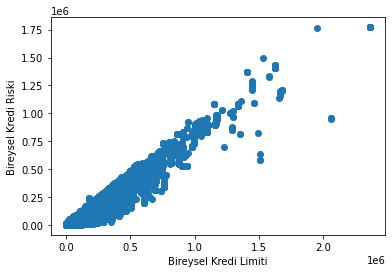

In [82]:
plt.scatter(g_company_type_df["BK_LIMIT"],
        g_company_type_df["BK_RISK"])

plt.xlabel("Bireysel Kredi Limiti")
plt.ylabel("Bireysel Kredi Riski")

In [92]:
# choose necessary inputs for using as feature in the model
clustering_cols_G=["BK_LIMIT","BK_RISK","BK_GECIKMEHESAP","BK_GECIKMEBAKIYE"]
g_cluster_df=g_company_type_df[clustering_cols_G]

> Scale Data

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [93]:
scaler.fit(g_cluster_df)
scaled_data = scaler.transform(g_cluster_df)

Find Optimal Numbers of Clusters with Elbow Method

Using function to implement it, because we are going to invoke this function again for T type customers.

In [98]:
def find_optimal_clusters(df, maximum_K):
    clusters_centers = []   # appending inertia value coming from the model
    k_values = []           # putting k values from 0 to maximum K

    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

About **Inertia**:

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters (K) *-Codeacademy*

In [95]:
def generate_elbow_plot(clusters_centers, k_values):
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'blue')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of Model")
    plt.show()

> Visualize Elbow Method

We aim to maximize the efficiency of segmentation while minimizing the number of clusters. In this sense, Elbow Method is crucial concept to satisfy this requirement.


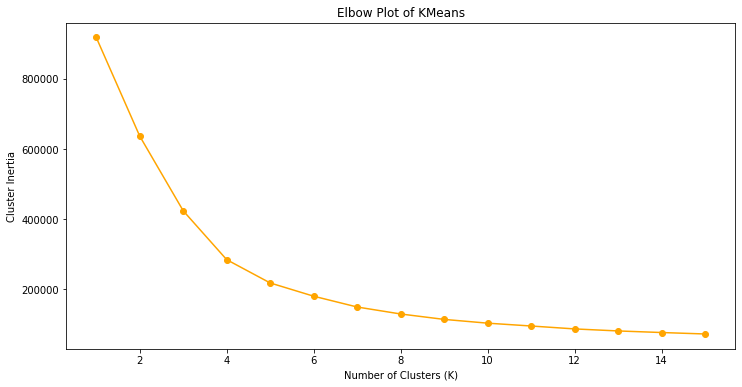

In [99]:
clusters_centers, k_values = find_optimal_clusters(scaled_data, 16)

generate_elbow_plot(clusters_centers, k_values)

Putting into K-means Model

In [100]:
kmeans_model = KMeans(n_clusters = 4)       # declare number of clusters, which identified on elbow method
kmeans_model.fit(scaled_data)               # and fit model here

KMeans(n_clusters=4)

In [101]:
g_cluster_df["clusters"] = kmeans_model.labels_

c:\Users\emirh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
g_cluster_df.head(10)

,BK_LIMIT,BK_RISK,BK_GECIKMEHESAP,BK_GECIKMEBAKIYE,clusters
0,0.0,0.0,0.0,0.0,0
1,2213.0,226.0,2.0,1012.0,0
2,0.0,0.0,0.0,0.0,0
3,52100.0,9481.0,3.0,3575.0,0
4,280101.0,211301.0,3.0,4128.0,2
5,280101.0,211301.0,3.0,4128.0,2
6,0.0,0.0,0.0,0.0,0
7,215261.0,150619.0,1.0,847.0,2
8,104384.0,65599.0,3.0,2591.0,1
9,215860.0,85589.0,4.0,6379.0,1


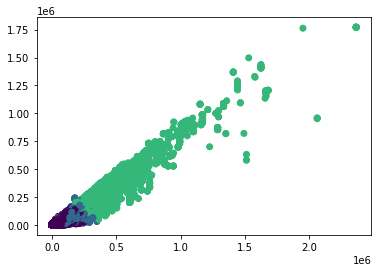

In [107]:
plt.scatter(g_cluster_df["BK_LIMIT"],g_cluster_df["BK_RISK"],
            c = g_cluster_df["clusters"])